In [60]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [43]:
data_frame = pd.DataFrame.from_csv('us-counties.csv')

C:\Users\zacha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [44]:
maryland_data = data_frame.loc[data_frame['state'] == "Maryland"]
pa_data = data_frame.loc[data_frame['state']=="Pennsylvania"]
fl_data = data_frame.loc[data_frame['state']=="Florida"]
va_data = data_frame.loc[data_frame['state']=='Virginia']

In [45]:
montgomery_county = maryland_data.loc[maryland_data['county'] == "Montgomery"]
frederick_county = maryland_data.loc[maryland_data['county'] == "Frederick"]
washington_county = pa_data.loc[pa_data['county'] == "Washington"]
allegheny_county = pa_data.loc[pa_data['county'] == 'Allegheny']
fairfax_county = va_data.loc[va_data['county']=="Fairfax"]
sarasota_county = fl_data.loc[fl_data['county']=='Sarasota']

Text(0.5,1,'Confirmed Cases')

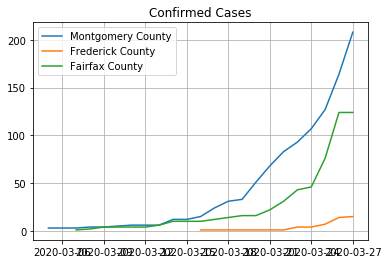

In [96]:
fig = plt.figure()
plt.plot(montgomery_county['cases'], label='Montgomery County')
plt.plot(frederick_county['cases'], label='Frederick County')
plt.plot(fairfax_county['cases'], label='Fairfax County')
plt.grid(True)
plt.legend()
plt.title('Confirmed Cases')

Ok we have some plots, can we figure out how ominious the futures look for each of them? aka which derivative is worse


In [53]:
montgomery_cases = montgomery_county['cases'].values
frederick_cases = frederick_county['cases'].values
washington_cases = washington_county['cases'].values
allegheny_cases = allegheny_county['cases'].values
fairfax_cases = fairfax_county['cases'].values
sarasota_cases = sarasota_county['cases'].values

In [81]:
def extrapolateData(data_in, days_ahead):
    days_past = np.arange(data_in.size)
    data_polyfit = np.polyfit(days_past,data_in,3)
    return np.polyval(data_polyfit, days_ahead)   

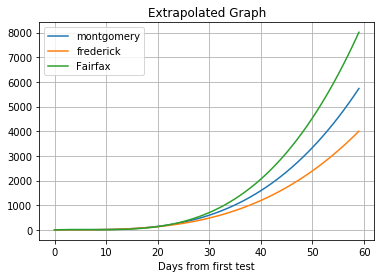

In [87]:
mont_future = extrapolateData(montgomery_cases, np.arange(60))
fred_future = extrapolateData(frederick_cases, np.arange(60))
fairfax_future = extrapolateData(fairfax_cases, np.arange(60))


plt.plot(mont_future, label='montgomery')
plt.plot(fred_future, label='frederick')
plt.plot(fairfax_future, label='Fairfax')
plt.grid(True)
plt.title('Extrapolated Graph')
plt.xlabel('Days from first test')
plt.legend()

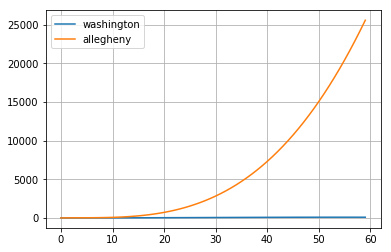

In [84]:
wash_future = extrapolateData(washington_cases, np.arange(60))
allegeny_future= extrapolateData(allegheny_cases, np.arange(60))

plt.plot(wash_future, label='washington')
plt.plot(allegeny_future, label='allegheny')
plt.grid(True)
plt.legend()

In [91]:
data_frame['date']

KeyError: 'date'

In [93]:
data_frame['county']

date
2020-01-21      Snohomish
2020-01-22      Snohomish
2020-01-23      Snohomish
2020-01-24           Cook
2020-01-24      Snohomish
2020-01-25         Orange
2020-01-25           Cook
2020-01-25      Snohomish
2020-01-26       Maricopa
2020-01-26    Los Angeles
2020-01-26         Orange
2020-01-26           Cook
2020-01-26      Snohomish
2020-01-27       Maricopa
2020-01-27    Los Angeles
2020-01-27         Orange
2020-01-27           Cook
2020-01-27      Snohomish
2020-01-28       Maricopa
2020-01-28    Los Angeles
2020-01-28         Orange
2020-01-28           Cook
2020-01-28      Snohomish
2020-01-29       Maricopa
2020-01-29    Los Angeles
2020-01-29         Orange
2020-01-29           Cook
2020-01-29      Snohomish
2020-01-30       Maricopa
2020-01-30    Los Angeles
                 ...     
2020-03-27        Ozaukee
2020-03-27         Pierce
2020-03-27        Portage
2020-03-27         Racine
2020-03-27       Richland
2020-03-27           Rock
2020-03-27           Sauk
2020-03